In [10]:
import pandas as pd
from datetime import datetime, timedelta
import re
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("df_main.csv")
df

,ITEM_ID,ITEM_DESCRIPTION,CHANNEL,STORE_ID,PERIOD_ID,SALES_UNITS_EXPANDED,SALES_VOLUME_EXPANDED,SALES_VALUE_EXPANDED,PROMO
0,1,001_Item,TOTAL_MARKET,31905,70,1,1.0,199.9,0
1,1,001_Item,TOTAL_MARKET,31905,71,3,3.0,599.7,0
2,1,001_Item,TOTAL_MARKET,31905,72,1,1.0,199.9,0
3,1,001_Item,TOTAL_MARKET,31905,73,4,4.0,799.6,0
4,1,001_Item,TOTAL_MARKET,31905,77,1,1.0,219.9,1
...,...,...,...,...,...,...,...,...,...
7500180,8,008_Item,TOTAL_MARKET,24170,41,2,0.2,270.0,1
7500181,8,008_Item,TOTAL_MARKET,24170,42,1,0.1,135.0,1
7500182,8,008_Item,TOTAL_MARKET,24170,43,1,0.1,135.0,1
7500183,8,008_Item,TOTAL_MARKET,24170,44,2,0.2,270.0,1


In [4]:
df.shape

(7500185, 9)

In [2]:
import numpy as np

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500185 entries, 0 to 7500184
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ITEM_ID                int64  
 1   ITEM_DESCRIPTION       object 
 2   CHANNEL                object 
 3   STORE_ID               int64  
 4   PERIOD_ID              int64  
 5   SALES_UNITS_EXPANDED   int64  
 6   SALES_VOLUME_EXPANDED  float64
 7   SALES_VALUE_EXPANDED   float64
 8   PROMO                  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 515.0+ MB


In [7]:
df

,ITEM_ID,ITEM_DESCRIPTION,CHANNEL,STORE_ID,PERIOD_ID,SALES_UNITS_EXPANDED,SALES_VOLUME_EXPANDED,SALES_VALUE_EXPANDED,PROMO
0,1,001_Item,TOTAL_MARKET,31905,70,1,1.0,199.9,0
1,1,001_Item,TOTAL_MARKET,31905,71,3,3.0,599.7,0
2,1,001_Item,TOTAL_MARKET,31905,72,1,1.0,199.9,0
3,1,001_Item,TOTAL_MARKET,31905,73,4,4.0,799.6,0
4,1,001_Item,TOTAL_MARKET,31905,77,1,1.0,219.9,1
...,...,...,...,...,...,...,...,...,...
7500180,8,008_Item,TOTAL_MARKET,24170,41,2,0.2,270.0,1
7500181,8,008_Item,TOTAL_MARKET,24170,42,1,0.1,135.0,1
7500182,8,008_Item,TOTAL_MARKET,24170,43,1,0.1,135.0,1
7500183,8,008_Item,TOTAL_MARKET,24170,44,2,0.2,270.0,1


In [12]:
min_val = df['PERIOD_ID'].min()
start_date = datetime.strptime(r'2019-19-0', "%Y-%U-%w")
start_date = datetime.strftime(start_date, "%Y-%m-%d")
start_date = datetime.strptime(start_date, "%Y-%m-%d")  # Week 19, 2019


In [13]:
df['PERIOD_ID'] = df['PERIOD_ID'].apply(lambda x: start_date + timedelta(weeks=int(x - min_val)))

# Comment
<span style='color:green; font-size:15px;'> <b>Correct</b>

In [11]:
z_dict = []
with open(r"z_factors.txt", 'r', encoding='utf-8') as data:
    for i_line in data:
        z_dict.append(i_line.split())

z_df = pd.DataFrame(data=z_dict[1:], columns=z_dict[0])
z_df['STORE_ID'] = z_df['STORE_ID'].astype(int)
z_df['Zf'] = z_df['Zf'].astype(float)

df = pd.merge(df, z_df, how='left', on='STORE_ID')

df_by_date_by_item = df.groupby(['ITEM_ID', 'PERIOD_ID']).agg({'Zf': 'sum'}).reset_index()

df_by_date = df.groupby(['PERIOD_ID']).agg({'Zf': 'sum'}).rename(columns={'Zf': 'Zf_common'}).reset_index()

df_by_date_by_item = pd.merge(df_by_date_by_item, df_by_date, on='PERIOD_ID')

df_by_date_by_item['Numeric distribution'] = df_by_date_by_item['Zf'] / df_by_date_by_item['Zf_common']

min_dist = df_by_date_by_item.groupby('ITEM_ID')['Numeric distribution'].transform(min)
df_by_date_by_item = df_by_date_by_item[df_by_date_by_item['Numeric distribution'] > min_dist]

df_by_date_by_item.reset_index(drop=True, inplace=True)

<ipython-input-11-a0862c89148c>:20: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  min_dist = df_by_date_by_item.groupby('ITEM_ID')['Numeric distribution'].transform(min)


# Comment
<span style='color:green; font-size:15px;'> <b>Correct</b>

In [14]:
def is_Promo(promo_list):
    promo_list = map(str, promo_list)
    promo_list = ''.join(promo_list)
    res = re.findall(r'1+', promo_list)
    if len(res) == 0:
        return 0
    per = len(max(res)) / len(promo_list)
    if per >= 0.75:
        return 1
    else:
        return 0

df_Promo = df.sort_values(['STORE_ID', 'ITEM_ID', 'PERIOD_ID'])

# Группировка по ITEM_ID и STORE_ID и применение функции is_Promo
df_Promo1 = df_Promo.groupby(['ITEM_ID', 'STORE_ID'])['PROMO'].agg(lambda x: list(x)).reset_index(name='new')
df_Promo1['Promo'] = df_Promo1['new'].apply(is_Promo)
df_Promo1.drop('new', axis=1, inplace=True)

# Объединение с основным датафреймом для добавления PROMO SHOP переменной
df = pd.merge(df, df_Promo1[['ITEM_ID', 'STORE_ID', 'Promo']], on=['ITEM_ID', 'STORE_ID'], how='left')
df
# Удаление магазинов, где PROMO SHOP равно 1
df = df[df['Promo'] != 1]

df.drop('Promo', axis=1, inplace=True)

In [15]:
df['Year'] = df['PERIOD_ID'].apply(lambda x: int(x.year))
df['Month'] = df['PERIOD_ID'].apply(lambda x: int(x.month))


#Функция определяющая квартал:
def quarter(month):
  if month <= 3:
    return 1
  elif  3 <  month <= 6:
    return 2
  elif  6 <  month <= 9:
    return 3
  elif  9 <  month <= 12:
    return 4

df['Quarter'] = df['Month'].apply(quarter)

df_2020 = df[df['Year'] == 2020]

In [14]:
df_cl = pd.read_csv(r"client_POSM_data.csv")
#Разделяем в client Posm Data колонку Date на квартал и год
def quar(date):
  res = date.split('-')
  quar = int(res[0].replace('Q', ''))
  return quar
def year(date):
  res = date.split('-')
  y = int('20'.join(res[1]))
  return y
df_cl['Quarter'] = df_cl['Date'].apply(quar)
df_cl['Year'] = df_cl['Date'].apply(year)
#Добавляем колонку с номером бренда
df_cl['Brand_number'] = df_cl['Brand'].apply(lambda x: float(x.replace('Brand ', '')))



In [16]:
df_niq = pd.read_csv(r"Nielsen_POSM_data.csv")
df_con_brand = pd.read_excel(r"mapping_file.xlsx", sheet_name='brand')
df_con_ret = pd.read_excel(r"mapping_file.xlsx", sheet_name='retailer')

In [14]:
#Задание 2.1


#Добавляем в mapping_file колонку ITEM_ID
df_con_brand['ITEM_ID'] = df_con_brand['Item_Description'].apply(lambda x: int(x.replace('Item_', '')))
# Объединение данных о продажах с mapping по ITEM_ID
df = pd.merge(df, df_con_brand, how='left', on='ITEM_ID')
# Объединение данных о продажах с mapping по STORE_ID
df = pd.merge(df, df_con_ret, how='left', on='STORE_ID')


# Объединение данных о продажах с данными клиентов
df_concat_cl = pd.merge(df, df_cl, how='left', on=['Brand_number', 'Year', 'Quarter', 'Retailer'])
df_concat_cl

,ITEM_ID,ITEM_DESCRIPTION,CHANNEL,STORE_ID,PERIOD_ID,SALES_UNITS_EXPANDED,SALES_VOLUME_EXPANDED,SALES_VALUE_EXPANDED,PROMO,Zf,...,Quarter,Brand_number,Item_Description,Retailer,Date,Brand,POSM 1,POSM 2,POSM 3,POSM 4
0,1,001_Item,TOTAL_MARKET,31905,2020-07-05,1,1.0,199.90,0,1.0,...,3,1.0,Item_1,Retailer 1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,001_Item,TOTAL_MARKET,31905,2020-07-12,3,3.0,599.70,0,1.0,...,3,1.0,Item_1,Retailer 1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,001_Item,TOTAL_MARKET,31905,2020-07-19,1,1.0,199.90,0,1.0,...,3,1.0,Item_1,Retailer 1,NaN,NaN,NaN,NaN,NaN,NaN
3,1,001_Item,TOTAL_MARKET,31905,2020-07-26,4,4.0,799.60,0,1.0,...,3,1.0,Item_1,Retailer 1,NaN,NaN,NaN,NaN,NaN,NaN
4,1,001_Item,TOTAL_MARKET,31905,2020-08-23,1,1.0,219.90,1,1.0,...,3,1.0,Item_1,Retailer 1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7467458,8,008_Item,TOTAL_MARKET,24166,2020-04-26,1,0.1,209.99,0,1.0,...,2,4.0,Item_8,Retailer 4,NaN,NaN,NaN,NaN,NaN,NaN
7467459,8,008_Item,TOTAL_MARKET,24166,2020-05-03,2,0.2,259.98,0,1.0,...,2,4.0,Item_8,Retailer 4,NaN,NaN,NaN,NaN,NaN,NaN
7467460,8,008_Item,TOTAL_MARKET,24166,2020-05-10,3,0.3,389.97,0,1.0,...,2,4.0,Item_8,Retailer 4,NaN,NaN,NaN,NaN,NaN,NaN
7467461,8,008_Item,TOTAL_MARKET,24166,2020-05-31,3,0.3,479.97,0,1.0,...,2,4.0,Item_8,Retailer 4,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Задание 2.2
# Объединение данных о продажах с данными Nielsen POSM
# df_niq = pd.merge(df, df_niq, how='left', on='STORE_ID')

# Объединение данных df_2020 с данными Nielsen POSM
df_niq_2020 = pd.merge(df_2020, df_niq, how='left', on='STORE_ID')
# Преобразование данных о присутствии брендов в бинарные переменные
df_niq_2020['Brand A'] = df_niq_2020['Brand A'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_niq_2020['Brand B'] = df_niq_2020['Brand B'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_niq_2020['Brand C'] = df_niq_2020['Brand C'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Подсчет количества брендов в магазине
df_niq_2020['Brand_count'] = df_niq_2020[['Brand A', 'Brand B', 'Brand C']].sum(axis=1)

# Определение наличия POSM
df_niq_2020['Has_Posm'] = df_niq_2020['Brand_count'].apply(lambda x: 1 if x >= 1 else 0)

In [20]:
#Задание 2.3
def granularity(numb, gran=2):
  return round(numb, gran)
# Вычисление среднего количества оборудования по месяцам
df_mean_eq = df_niq_2020.groupby('Month')['Brand_count'].mean().reset_index(name='Avg_equipment').apply(granularity)

# Вычисление проникновения POSM
df_penetr = df_niq_2020.groupby('Month').agg({'Has_Posm': ['sum', 'count']}).reset_index()
df_penetr.columns = ['Month', 'POSM_Present', 'Total_Shops']
df_penetr['Penetration'] = (df_penetr['POSM_Present'] / df_penetr['Total_Shops']) * 100
df_penetr['Penetration'] = df_penetr['Penetration'].apply(granularity)

# Вычисление поддержки промоакций
df_niq_2020['Prom-Posm'] = df_niq_2020['Has_Posm'] * df_niq_2020['PROMO']
df_support = df_niq_2020.groupby('Month').agg({'Has_Posm': 'sum', 'Prom-Posm': 'sum'}).reset_index()
df_support['Support_pr'] = df_support['Prom-Posm'] / df_support['Has_Posm'] * 100
df_support['Support_pr'] = df_support['Support_pr'].apply(granularity)
# Вычисление прироста продаж
df_sales_with_Posm = df_niq_2020[df_niq_2020['Has_Posm'] == 1].groupby('Month').agg({'SALES_UNITS_EXPANDED': 'sum'}).reset_index()
df_sales_without_Posm = df_niq_2020[df_niq_2020['Has_Posm'] == 0].groupby('Month').agg({'SALES_UNITS_EXPANDED': 'sum'}).reset_index()
df_uplift = pd.merge(df_sales_with_Posm, df_sales_without_Posm, how='left', on='Month', suffixes=('_with_Posm', '_without_Posm'))
df_uplift['Uplift'] = (df_uplift['SALES_UNITS_EXPANDED_with_Posm'] / df_uplift['SALES_UNITS_EXPANDED_without_Posm']) * 100
df_uplift['Uplift'] = df_uplift['Uplift'].apply(granularity)
summary = df_mean_eq.merge(df_penetr[['Month', 'Penetration']], on='Month')
summary = summary.merge(df_support[['Month', 'Support_pr']], on='Month')
summary = summary.merge(df_uplift[['Month', 'Uplift']], on='Month')


# Comment
<span style='color:green; font-size:15px;'> <b>3.3 looks correct</b>

# Comment
<span style='color:red; font-size:15px;'> It is much better to set this answer as a function/class with granularity dimensions as input. This would have been more usefull when preparing answers to 3.1 and 3.2

In [21]:
summary

,Month,Avg_equipment,Penetration,Support_pr,Uplift
0,1,0.49,28.14,20.54,40.61
1,2,0.50,28.67,15.20,42.33
2,3,0.49,28.53,11.33,41.39
3,4,0.51,29.56,10.59,42.23
4,5,0.51,29.24,9.74,41.32
5,6,0.52,30.08,7.75,43.10
6,7,0.55,31.65,9.32,47.34
7,8,0.54,31.57,7.47,43.28
8,9,0.55,31.90,7.58,48.42
9,10,0.54,31.12,9.43,44.61


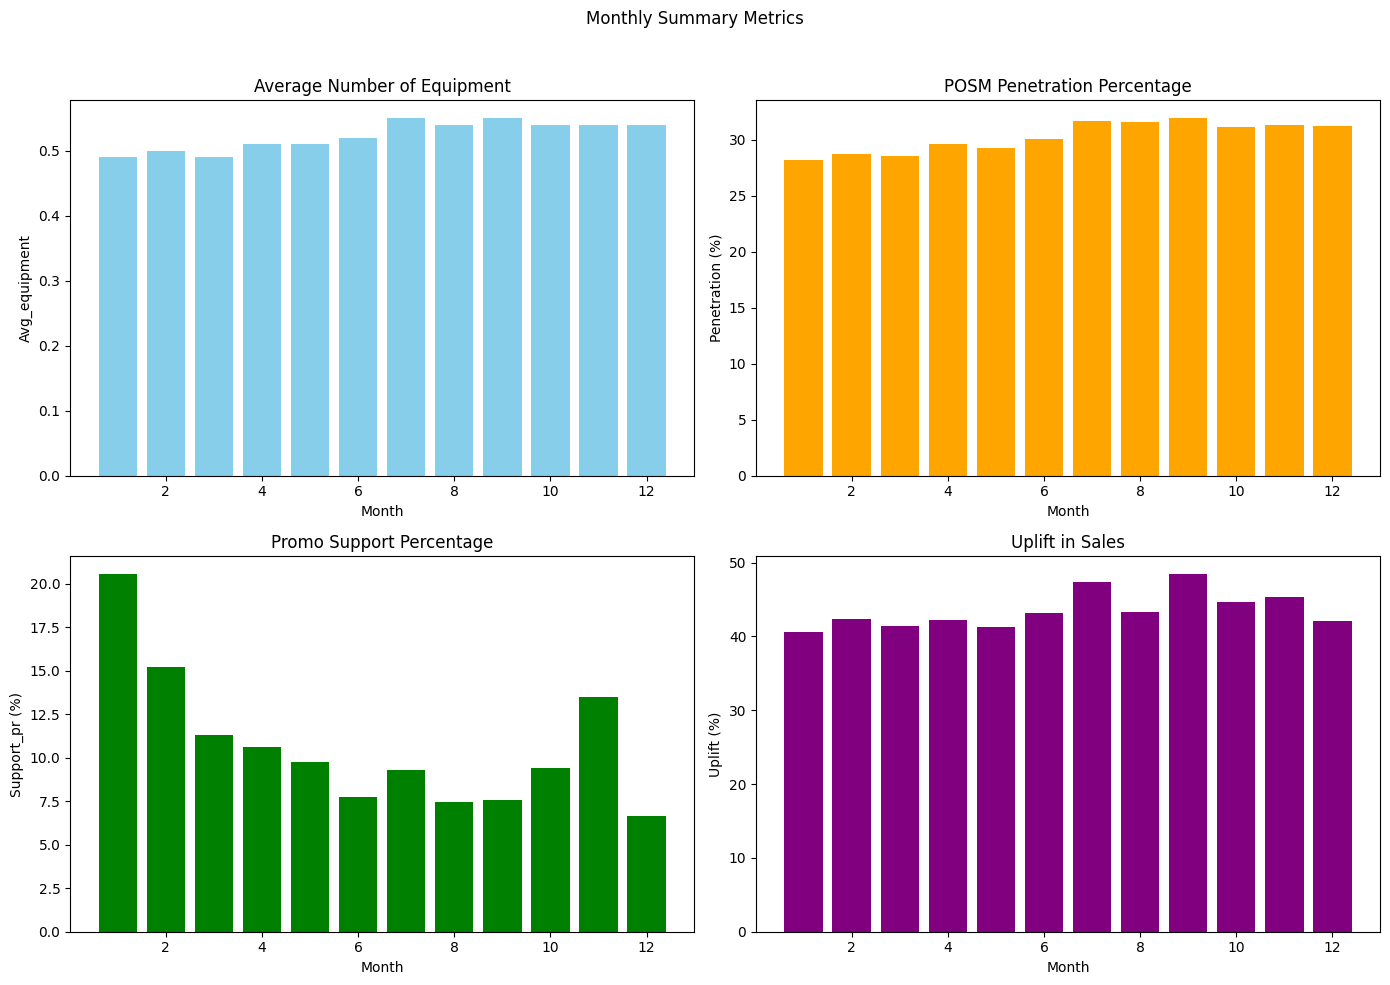

In [22]:
df_summary = summary

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Monthly Summary Metrics')

axes[0, 0].bar(df_summary['Month'], df_summary['Avg_equipment'], color='skyblue')
axes[0, 0].set_title('Average Number of Equipment')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Avg_equipment')

axes[0, 1].bar(df_summary['Month'], df_summary['Penetration'], color='orange')
axes[0, 1].set_title('POSM Penetration Percentage')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Penetration (%)')

axes[1, 0].bar(df_summary['Month'], df_summary['Support_pr'], color='green')
axes[1, 0].set_title('Promo Support Percentage')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Support_pr (%)')

axes[1, 1].bar(df_summary['Month'], df_summary['Uplift'], color='purple')
axes[1, 1].set_title('Uplift in Sales')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Uplift (%)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
df_niq_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232257 entries, 0 to 4232256
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ITEM_ID                int64         
 1   ITEM_DESCRIPTION       object        
 2   CHANNEL                object        
 3   STORE_ID               int64         
 4   PERIOD_ID              datetime64[ns]
 5   SALES_UNITS_EXPANDED   int64         
 6   SALES_VOLUME_EXPANDED  float64       
 7   SALES_VALUE_EXPANDED   float64       
 8   PROMO                  int64         
 9   Zf                     float64       
 10  Year                   int64         
 11  Month                  int64         
 12  CITY                   object        
 13  POSM                   float64       
 14  POSM_SIZE              object        
 15  POSM_TYPE              object        
 16  POSM_LOC_1             object        
 17  POSM_LOC_2             object        
 18  Brand A               

In [ ]:
df_niq_2020["CHANNEL"].unique()

array(['TOTAL_MARKET'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7467463 entries, 0 to 7500163
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ITEM_ID                int64         
 1   ITEM_DESCRIPTION       object        
 2   CHANNEL                object        
 3   STORE_ID               int64         
 4   PERIOD_ID              datetime64[ns]
 5   SALES_UNITS_EXPANDED   int64         
 6   SALES_VOLUME_EXPANDED  float64       
 7   SALES_VALUE_EXPANDED   float64       
 8   PROMO                  int64         
 9   Zf                     float64       
 10  Year                   int64         
 11  Month                  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 740.6+ MB


In [ ]:
pivot_tables = {}

pivot_tables['POSM_SIZE'] = df_niq_2020.pivot_table(
    values=['SALES_UNITS_EXPANDED', 'SALES_VALUE_EXPANDED', 'Brand_count'],
    index='POSM_SIZE',
    aggfunc={'SALES_UNITS_EXPANDED': 'sum', 'SALES_VALUE_EXPANDED': 'sum', 'Brand_count': 'mean'}
)

pivot_tables['POSM_TYPE'] = df_niq_2020.pivot_table(
    values=['SALES_UNITS_EXPANDED', 'SALES_VALUE_EXPANDED', 'Brand_count'],
    index='POSM_TYPE',
    aggfunc={'SALES_UNITS_EXPANDED': 'sum', 'SALES_VALUE_EXPANDED': 'sum', 'Brand_count': 'mean'}
)

pivot_tables['CHANNEL'] = df_niq_2020.pivot_table(
    values=['SALES_UNITS_EXPANDED', 'SALES_VALUE_EXPANDED', 'Brand_count'],
    index='CHANNEL',
    aggfunc={'SALES_UNITS_EXPANDED': 'sum', 'SALES_VALUE_EXPANDED': 'sum', 'Brand_count': 'mean'}
)

pivot_tables['Brand'] = df_niq_2020.pivot_table(
    values=['SALES_UNITS_EXPANDED', 'SALES_VALUE_EXPANDED'],
    index=['Brand A', 'Brand B', 'Brand C'],
    aggfunc={'SALES_UNITS_EXPANDED': 'sum', 'SALES_VALUE_EXPANDED': 'sum'}
)

In [ ]:
pivot_tables

{'POSM_SIZE':            Brand_count  SALES_UNITS_EXPANDED  SALES_VALUE_EXPANDED
 POSM_SIZE                                                         
 <500          0.919973               2789954          3.833626e+08
 >500&<900     0.874802               2587940          3.615660e+08
 >900          0.714635               6533835          9.033970e+08,
 'POSM_TYPE':               Brand_count  SALES_UNITS_EXPANDED  SALES_VALUE_EXPANDED
 POSM_TYPE                                                            
 monobrand        1.707682               3534081          4.869690e+08
 multibrand 2     1.759236                471250          6.461795e+07
 multibrand 3     1.721316                529600          7.249109e+07
 multibrand 4     1.691046                 70106          9.735089e+06
 multibrand 5     1.707747                147226          1.990816e+07
 multibrand 6     1.705058                264275          3.631282e+07
 multibrand 7     1.733890                587477          8.15690

In [ ]:
# Сохранение сводных таблиц и сводной таблицы в Excel
with pd.ExcelWriter('Monthly_Summary_Report_with_Pivot_Tables.xlsx') as writer:
    df_summary.to_excel(writer, sheet_name='Summary', index=False)
    for sheet_name, pivot_table in pivot_tables.items():
        pivot_table.to_excel(writer, sheet_name=sheet_name)